# 0. Load results and tools

* Get paths to RJMC output, import bayes_implicit_solvent, load and join the outputs...

In [22]:
from tree_rjmc_w_elements import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
npz = '/Users/joshuafass/Documents/GitHub/bayes-implicit-solvent/bayes_implicit_solvent/rjmc_experiments/tree_rjmc_from_elemental_n_iter=5000_ll=student-t_job_id=1274.npz'
pkl = '/Users/joshuafass/Documents/GitHub/bayes-implicit-solvent/bayes_implicit_solvent/rjmc_experiments/tree_rjmc_from_elemental_n_iter=5000_ll=student-t_job_id=1274.pkl'

continued_npz = '/Users/joshuafass/Documents/GitHub/bayes-implicit-solvent/bayes_implicit_solvent/rjmc_experiments/tree_rjmc_from_elemental_n_iter=5000_ll=student-t_job_id=992_continued_.npz'
continued_pkl = '/Users/joshuafass/Documents/GitHub/bayes-implicit-solvent/bayes_implicit_solvent/rjmc_experiments/tree_rjmc_from_elemental_n_iter=5000_ll=student-t_job_id=992_continued_.pkl'

In [24]:
result0 = np.load(npz)
result1 = np.load(continued_npz)
print(result0['predictions'].shape, result1['predictions'].shape)

(1000, 631) (1000, 631)


In [60]:
from pickle import load
with open(pkl, 'rb') as f:
    tree_traj0 = load(f)
with open(continued_pkl, 'rb') as f:
    tree_traj1 = load(f)
tree_traj = tree_traj0[1:] + tree_traj1[1:]
print(len(tree_traj))

2000


## 0.1. Form prediction traj

In [61]:
prediction_traj = np.vstack(
    [result0['predictions'],
     result1['predictions'],
    ])
prediction_traj.shape

(2000, 631)

## 0.2. Form RMSE traj

In [62]:
get_rmse_in_kcal_per_mol(prediction_traj[0])

2.4218994256593973

In [63]:
rmse_traj = list(map(get_rmse_in_kcal_per_mol, prediction_traj))

# 0.3. Form within_model_trajs

# 0.3.1. Split by element

## 0.4. Form n_types_traj

In [64]:
tree = tree_traj[0]

In [65]:
n_types_traj = [tree.number_of_nodes for tree in tree_traj]

# 1. Exploratory / diagnostic plots

In [66]:
min_from_fixed_dimension_sampling = 1.6344935894012451

In [67]:
n_steps_per_cm_proposal = 5
x = np.arange(len(rmse_traj)) * n_steps_per_cm_proposal

Text(0.5, 0, 'iterations of variable-dimension MCMC\n(one cross-model proposal per 5 within-model steps)')

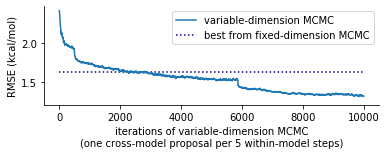

In [542]:
ax = plt.subplot(2,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(x, rmse_traj, label='variable-dimension MCMC')

#plt.hlines(2.62, 0, x[-1], linestyles='dashed', color='grey', label='OBC2')
plt.hlines(min_from_fixed_dimension_sampling, 0, x[-1], linestyles='dotted', color='darkblue', label='best from fixed-dimension MCMC')
plt.ylim(1.2,)
plt.legend(loc='best')
plt.ylabel('RMSE (kcal/mol)')
plt.xlabel('iterations of variable-dimension MCMC\n(one cross-model proposal per 5 within-model steps)')

In [69]:
len(n_types_traj)

2000

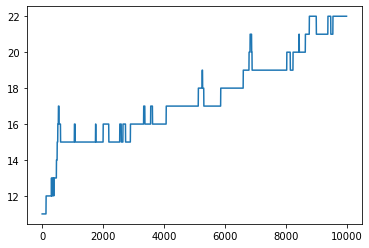

In [70]:
plt.plot(x, n_types_traj)

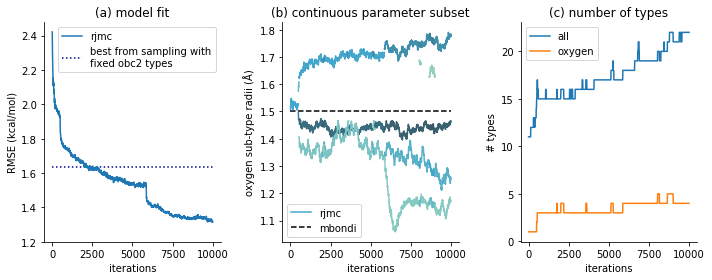

In [581]:
def clean_ax(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax

plt.figure(figsize=(10,4))

# 1. RMSE
ax = clean_ax(plt.subplot(1,3,1))
plt.plot(x, rmse_traj, label='rjmc')
plt.title('(a) model fit')
#plt.hlines(2.62, 0, x[-1], linestyles='dashed', color='grey', label='OBC2')
plt.hlines(min_from_fixed_dimension_sampling, 0, x[-1], linestyles='dotted', color='darkblue', label='best from sampling with\nfixed obc2 types')
plt.ylim(1.2,)
#plt.yticks(np.arange(1.2, 2.5,0.2))
plt.legend(loc='best')
plt.ylabel('RMSE (kcal/mol)')
plt.xlabel('iterations')
# 2. oxygen radii
#plt.title(parent_type)
ax = clean_ax(plt.subplot(1,3,2))
plt.hlines(default_r, 0, ind_sub_trajs[-1][-1] * n_steps_per_cm_proposal, linestyles='--', label='mbondi')
for i in range(len(ind_sub_trajs)):
    n_dim = r_sub_trajs[i].shape[1]
    colors = sns.color_palette("GnBu_d", n_dim)
    for j in range(n_dim):
        label = None
        if i + j == 0:
            label = 'rjmc'
        plt.plot(ind_sub_trajs[i]*n_steps_per_cm_proposal, r_sub_trajs[i][:,j], color=colors[j], label=label)

    #plt.scatter([ind_sub_trajs[i][0]*n_steps_per_cm_proposal]*n_dim, r_sub_trajs[i][0], color='grey')
    #plt.scatter([ind_sub_trajs[i][-1]*n_steps_per_cm_proposal]*n_dim, r_sub_trajs[i][-1], color='grey')
    # TODO: include dot at split / merge points
    # TODO: include a little connector when there are splits / merges
#plt.xlabel('iteration')
plt.legend()
plt.ylabel('oxygen sub-type radii (Å)')
plt.xlabel('iterations')
plt.title('(b) continuous parameter subset')

# 3. n_types
ax = clean_ax(plt.subplot(1,3,3))
plt.plot(x, n_types_traj, label='all')
plt.plot(x, type_count_traj[:,node_to_ind['[#8]']], label='oxygen')
#plt.yticks(np.arange(11,23,2))
plt.ylabel('# types')
plt.legend()
plt.title('(c) number of types')






plt.tight_layout()

plt.xlabel('iterations')#\n(5 within-model steps per cross-model step)')

plt.savefig('rjmc_pilot_figure.png', dpi=300)


In [72]:
tree = tree_traj[-1]
tree

*                        (r = 1.84 Å, s = 0.60)
|-[#1]                   (r = 0.75 Å, s = 0.40)
|-[#6]                   (r = 1.79 Å, s = 0.84)
  |-[#6&H2]              (r = 1.59 Å, s = 0.93)
  |-[#6&H3]              (r = 1.69 Å, s = 0.89)
|-[#7]                   (r = 1.65 Å, s = 0.95)
  |-[#7&r6]              (r = 1.61 Å, s = 1.28)
|-[#8]                   (r = 1.46 Å, s = 1.00)
  |-[#8&H0]              (r = 1.78 Å, s = 0.96)
  |-[#8&r6]              (r = 1.25 Å, s = 1.42)
  |-[#8&-1]              (r = 1.17 Å, s = 1.10)
|-[#9]                   (r = 2.56 Å, s = 0.65)
|-[#15]                  (r = 2.10 Å, s = 0.20)
|-[#16]                  (r = 2.37 Å, s = 1.03)
  |-[#16&H0]             (r = 3.01 Å, s = 0.58)
    |-[#16&H0&X2]        (r = 1.92 Å, s = 1.18)
      |-[#16&H0&X2&a]    (r = 1.67 Å, s = 1.24)
  |-[#16&H2]             (r = 2.24 Å, s = 0.91)
  |-[#16&r7]             (r = 2.38 Å, s = 1.21)
|-[#17]                  (r = 1.64 Å, s = 1.09)
|-[#35]                  (r = 1.79 Å, s 

In [82]:
def get_parent_element(tree, smirks):
    if smirks == '*': return '*'
    while tree.get_parent_type(smirks) != '*':
        smirks = tree.get_parent_type(smirks)
    return smirks

In [83]:
for s in tree.nodes:
    print(s,'\t', get_parent_element(tree, s))

* 	 *
[#1] 	 [#1]
[#6] 	 [#6]
[#7] 	 [#7]
[#8] 	 [#8]
[#9] 	 [#9]
[#15] 	 [#15]
[#16] 	 [#16]
[#17] 	 [#17]
[#35] 	 [#35]
[#53] 	 [#53]
[#16&H0] 	 [#16]
[#6&H2] 	 [#6]
[#8&H0] 	 [#8]
[#8&r6] 	 [#8]
[#16&H0&X2] 	 [#16]
[#16&H2] 	 [#16]
[#8&-1] 	 [#8]
[#7&r6] 	 [#7]
[#16&r7] 	 [#16]
[#16&H0&X2&a] 	 [#16]
[#6&H3] 	 [#6]


In [88]:
initial_tree = tree_traj[0]
initial_tree.nodes

['*',
 '[#1]',
 '[#6]',
 '[#7]',
 '[#8]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#17]',
 '[#35]',
 '[#53]']

In [89]:
node_to_ind = {}
for i in range(len(initial_tree.nodes)):
    node_to_ind[initial_tree.nodes[i]] = i
node_to_ind

{'*': 0,
 '[#1]': 1,
 '[#6]': 2,
 '[#7]': 3,
 '[#8]': 4,
 '[#9]': 5,
 '[#15]': 6,
 '[#16]': 7,
 '[#17]': 8,
 '[#35]': 9,
 '[#53]': 10}

In [92]:
def get_type_counts(tree):
    counts = np.zeros((len(node_to_ind)), dtype=int)
    for s in tree.nodes:
        counts[node_to_ind[get_parent_element(tree, s)]] += 1
    return counts

In [93]:
get_type_counts(tree_traj[-1])

array([1, 1, 3, 2, 4, 1, 1, 6, 1, 1, 1])

In [95]:
type_count_traj = []
for tree in tree_traj:
    type_count_traj.append(get_type_counts(tree))
type_count_traj = np.array(type_count_traj)

In [101]:
initial_tree.nodes

['*',
 '[#1]',
 '[#6]',
 '[#7]',
 '[#8]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#17]',
 '[#35]',
 '[#53]']

In [102]:
np.bincount(type_count_traj[:,2])

array([   0,   77, 1814,  109])

didn't elaborate on type  [#1]
didn't elaborate on type  [#9]
didn't elaborate on type  [#15]
didn't elaborate on type  [#17]
didn't elaborate on type  [#35]
didn't elaborate on type  [#53]


Text(0, 0.5, '# of sub-types')

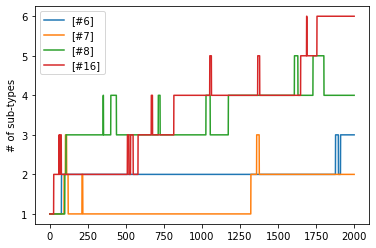

In [105]:
for i in range(1, len(initial_tree.nodes)):
    if len(set(type_count_traj[:,i])) == 1:
        print("didn't elaborate on type ", initial_tree.nodes[i])
    else:
        plt.plot(type_count_traj[:,i], label=initial_tree.nodes[i])
plt.legend(loc='best')
plt.ylabel('# of sub-types')

In [106]:
initial_tree.get_radius('*')

Quantity(value=0.1512641295793697, unit=nanometer)

In [107]:
def get_sub_parameters(tree, parent_type='[#8]'):
    radii = []
    scales = []
    for s in tree.nodes:
        if get_parent_element(tree, s) == parent_type:
            radii.append(tree.get_radius(s) / unit.angstrom)
            scales.append(tree.get_scale_factor(s))
    return radii, scales

In [214]:
def get_sub_trajs(tree_traj, parent_type='[#8]'):
    param_traj = [get_sub_parameters(t, parent_type) for t in tree_traj]
    r_traj = [r for (r,s) in param_traj]
    s_traj = [s for (r,s) in param_traj]
    
    ind_sub_trajs = []
    r_sub_trajs = []
    s_sub_trajs = []

    r = r_traj[0]
    s = s_traj[0]
    
    current_ind_sub_traj = [0]
    current_r_sub_traj = [r]
    current_s_sub_traj = [s]
    current_dim = len(r)


    for i in range(1,len(param_traj)):
        r = r_traj[i]
        s = s_traj[i]
        
        if len(r) == current_dim:
            current_ind_sub_traj.append(i)
            
            current_r_sub_traj.append(r)
            current_s_sub_traj.append(s)
            
        else:
            ind_sub_trajs.append(np.array(current_ind_sub_traj))
            r_sub_trajs.append(np.array(current_r_sub_traj))
            s_sub_trajs.append(np.array(current_s_sub_traj))

            current_ind_sub_traj = [i]
            current_r_sub_traj = [r]
            current_s_sub_traj = [s]
            current_dim = len(r)
    ind_sub_trajs.append(np.array(current_ind_sub_traj))
    r_sub_trajs.append(np.array(current_r_sub_traj))
    s_sub_trajs.append(np.array(current_s_sub_traj))
    return ind_sub_trajs, r_sub_trajs, s_sub_trajs

In [215]:
get_sub_parameters(tree_traj[-1], '[#16]')

([2.3662713951483063,
  3.0135476087752497,
  1.9165898159682078,
  2.236515473642471,
  2.3787145752948646,
  1.6666791142199686],
 [1.0255940087910436,
  0.5762934130097894,
  1.1821200894487256,
  0.9140921467936407,
  1.2123592410871624,
  1.2429381353427926])

In [253]:
parent_type = '[#8]'
ind_sub_trajs, r_sub_trajs, s_sub_trajs = get_sub_trajs(tree_traj, parent_type)
default_r = mbondi_model.get_radius(parent_type) / unit.angstrom

In [217]:
len(r_sub_trajs)

16

In [218]:
sub_trajs[0].shape

(99, 1)

In [219]:
import seaborn as sns
colors = sns.color_palette('viridis')

array([  98,  106,  350,  352,  400,  437,  712,  724, 1025, 1053, 1172,
       1606, 1629, 1728, 1800])

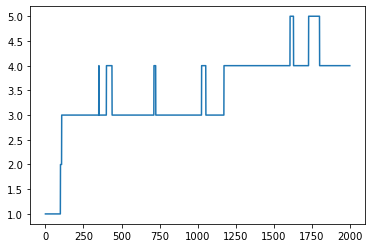

In [262]:
plt.plot(type_count_traj[:,node_to_ind[parent_type]])
change_points = np.where(np.diff(type_count_traj[:,node_to_ind[parent_type]]) != 0)[0]
change_points

In [267]:
[tree_traj[0]] + [tree_traj[i+1] for i in change_points]

[*          (r = 1.51 Å, s = 0.80)
 |-[#1]     (r = 1.18 Å, s = 0.87)
 |-[#6]     (r = 1.68 Å, s = 0.80)
 |-[#7]     (r = 1.54 Å, s = 0.79)
 |-[#8]     (r = 1.51 Å, s = 0.88)
 |-[#9]     (r = 1.50 Å, s = 0.89)
 |-[#15]    (r = 1.86 Å, s = 0.85)
 |-[#16]    (r = 1.80 Å, s = 0.98)
 |-[#17]    (r = 1.50 Å, s = 0.81)
 |-[#35]    (r = 1.49 Å, s = 0.80)
 |-[#53]    (r = 1.49 Å, s = 0.80), *               (r = 1.56 Å, s = 0.80)
 |-[#1]          (r = 0.94 Å, s = 0.59)
 |-[#6]          (r = 1.71 Å, s = 0.89)
   |-[#6&H2]     (r = 1.62 Å, s = 0.90)
 |-[#7]          (r = 1.58 Å, s = 0.89)
   |-[#7&H0]     (r = 1.54 Å, s = 0.89)
 |-[#8]          (r = 1.50 Å, s = 0.93)
   |-[#8&H0]     (r = 1.57 Å, s = 0.96)
 |-[#9]          (r = 1.63 Å, s = 0.89)
 |-[#15]         (r = 1.93 Å, s = 0.97)
 |-[#16]         (r = 1.90 Å, s = 0.96)
   |-[#16&H0]    (r = 2.17 Å, s = 1.01)
 |-[#17]         (r = 1.51 Å, s = 0.91)
 |-[#35]         (r = 1.46 Å, s = 0.83)
 |-[#53]         (r = 1.59 Å, s = 0.76), *             

Text(0, 0.5, 'radius (Å)')

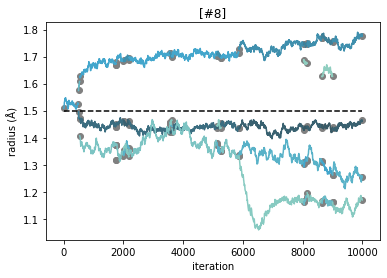

In [437]:
plt.title(parent_type)
plt.hlines(default_r, 0, ind_sub_trajs[-1][-1] * n_steps_per_cm_proposal, linestyles='--')
for i in range(len(ind_sub_trajs)):
    n_dim = r_sub_trajs[i].shape[1]
    colors = sns.color_palette("GnBu_d", n_dim)
    for j in range(n_dim):
        plt.plot(ind_sub_trajs[i]*n_steps_per_cm_proposal, r_sub_trajs[i][:,j], color=colors[j])

    plt.scatter([ind_sub_trajs[i][0]*n_steps_per_cm_proposal]*n_dim, r_sub_trajs[i][0], color='grey')
    plt.scatter([ind_sub_trajs[i][-1]*n_steps_per_cm_proposal]*n_dim, r_sub_trajs[i][-1], color='grey')
    # TODO: include dot at split / merge points
    # TODO: include a little connector when there are splits / merges
plt.xlabel('iteration')
plt.ylabel('radius (Å)')


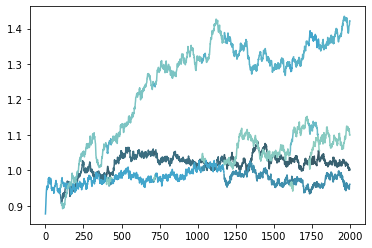

In [249]:

for i in range(len(ind_sub_trajs)):
    n_dim = r_sub_trajs[i].shape[1]
    colors = sns.color_palette("GnBu_d", n_dim)
    for j in range(n_dim):
        plt.plot(ind_sub_trajs[i], s_sub_trajs[i][:,j], color=colors[j])

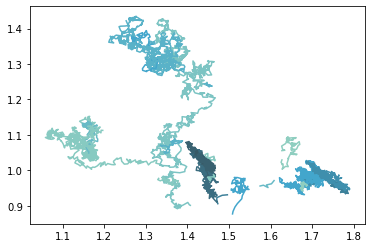

In [222]:
for i in range(len(ind_sub_trajs)):
    n_dim = r_sub_trajs[i].shape[1]
    colors = sns.color_palette("GnBu_d", n_dim)
    for j in range(n_dim):
        plt.plot(r_sub_trajs[i][:,j], s_sub_trajs[i][:,j], color=colors[j])

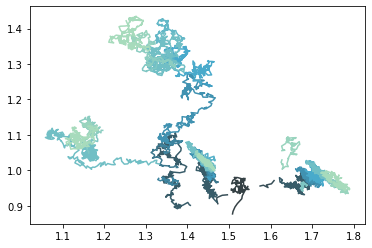

In [224]:
time_colors = sns.color_palette("GnBu_d", len(ind_sub_trajs))
for i in range(len(ind_sub_trajs)):
    n_dim = r_sub_trajs[i].shape[1]
    
    for j in range(n_dim):
        plt.plot(r_sub_trajs[i][:,j], s_sub_trajs[i][:,j], color=time_colors[i])
    

In [ ]:
change_points = np.diff()

In [ ]:
x_range = (1,2)
y_range = (0.75, 1.5)

In [ ]:
all_x = np.hstack([r_sub_trajs[i][:,j] for j in range(n_dim)])
all_y = np.hstack([s_sub_trajs[i][:,j] for j in range(n_dim)])
plt.figure()
sns.kdeplot(all_x, all_y, bw=0.01, shade=True, color=time_colors[i])
plt.xlim(*x_range)
plt.ylim(*y_range)

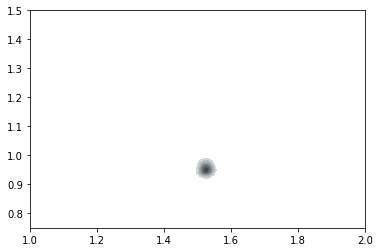

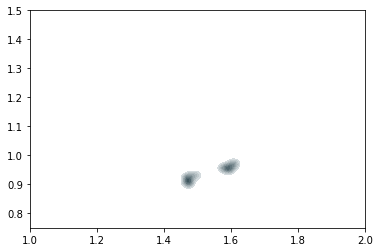

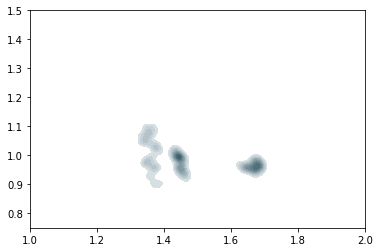

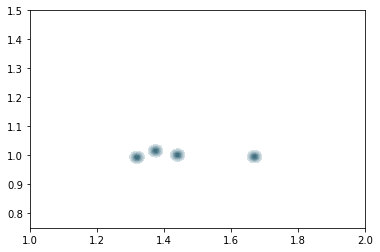

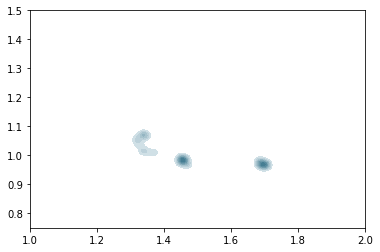

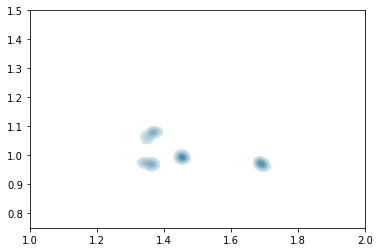

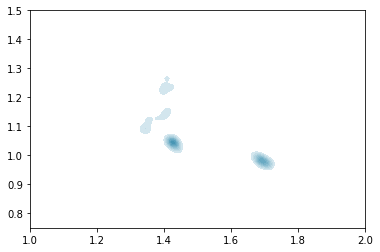

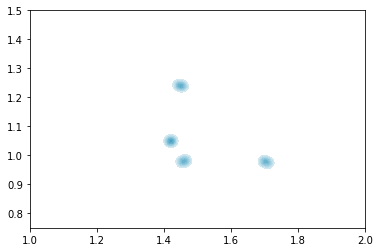

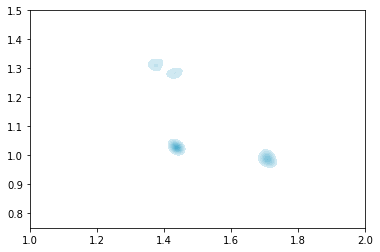

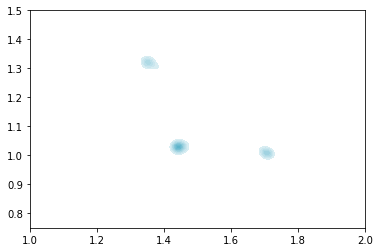

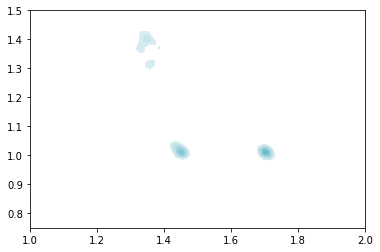

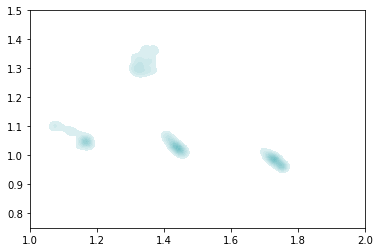

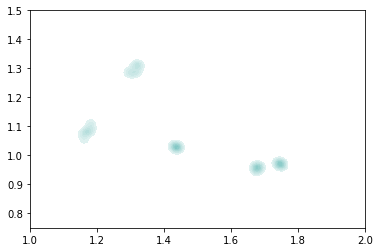

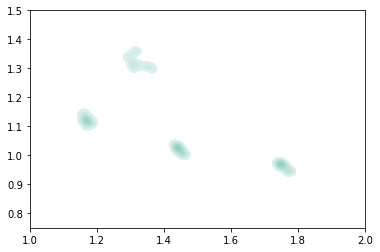

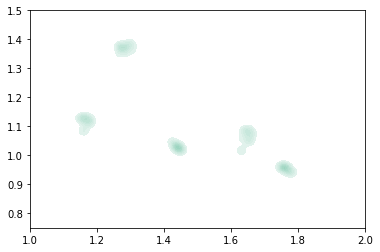

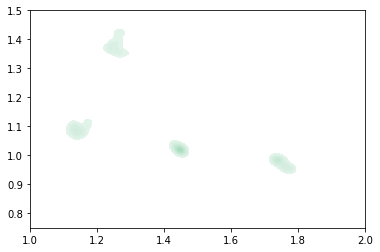

In [237]:
time_colors = sns.color_palette("GnBu_d", len(ind_sub_trajs))

x_range = (1,2)
y_range = (0.75, 1.5)
#x_range = (np.min(r_sub_trajs)-0.1, np.max(r_sub_trajs) + 0.1) #shape errors
#y_range = (np.min(s_sub_trajs)-0.1, np.max(s_sub_trajs) + 0.1) #shape errors

for i in range(len(ind_sub_trajs)):
    n_snaps = 
    n_dim = r_sub_trajs[i].shape[1]
    all_x = np.hstack([r_sub_trajs[i][:,j] for j in range(n_dim)])
    all_y = np.hstack([s_sub_trajs[i][:,j] for j in range(n_dim)])
    plt.figure()
    #sns.kdeplot(all_x, all_y, bw=0.01, shade=True, color=time_colors[i])
    #ax = sns.kdeplot(all_x, all_y, bw=0.01, color=time_colors[i], cut=0, shade=True)
    #ax.collections[0].set_alpha(0)
    ax = sns.kdeplot(all_x, all_y, bw=0.01, color=time_colors[i], shade=True, shade_lowest=False)
    
    plt.xlim(*x_range)
    plt.ylim(*y_range)

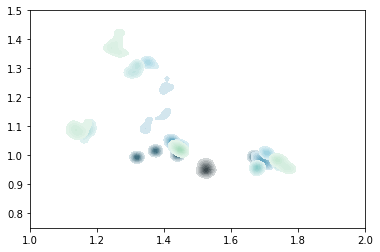

In [243]:
time_colors = sns.color_palette("GnBu_d", len(ind_sub_trajs))

x_range = (1,2)
y_range = (0.75, 1.5)

for i in range(len(ind_sub_trajs))[::3]:
    n_dim = r_sub_trajs[i].shape[1]
    all_x = np.hstack([r_sub_trajs[i][:,j] for j in range(n_dim)])
    all_y = np.hstack([s_sub_trajs[i][:,j] for j in range(n_dim)])

    ax = sns.kdeplot(all_x, all_y, bw=0.01, color=time_colors[i], shade=True, shade_lowest=False)
    
    plt.xlim(*x_range)
    plt.ylim(*y_range)

In [248]:
[len(s) for s in ind_sub_trajs]

[99, 8, 244, 2, 48, 37, 275, 12, 301, 28, 119, 434, 23, 99, 72, 199]

In [244]:
len(range(len(ind_sub_trajs))[::3])

6

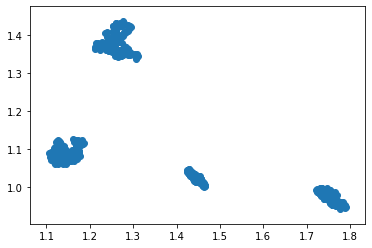

In [229]:
plt.scatter(all_x, all_y)

In [203]:
sub_trajs[-1].shape

(199, 4)

In [147]:
sub_trajs[0][-1], sub_trajs[1][0]

(array([1.87530438]), array([1.86847154, 2.09316646]))

In [148]:
sub_trajs[-2][-1], sub_trajs[-1][0]

(array([2.33161385, 2.94000298, 1.84370418, 2.17819432, 2.37898618]),
 array([2.32532399, 2.94209547, 1.84892112, 2.17267485, 2.3967319 ,
        1.68644304]))

# 2. Plot "RJMC for automatic model selection"

* Going to need plots of radii vs. iteration
    * Putting all gazillion parameter on top of each other will be crowded... Can zoom in on specific subsets of the parameters
    
* Going to need to print out some of the discrete trees visited...

* Going to need to show # of types vs. RJMC iteration
    * Comment on but don't necessarily solve the convergence issue
    
* Going to need to put a bincount on the right of the # types vs. iteration plot

# 3. Plot Bayesian Model Averaging for uncertainty quantification

* Using LOO CV...

In [497]:
# just eye-balled, since it's clearly not converged...
equil_step = 400

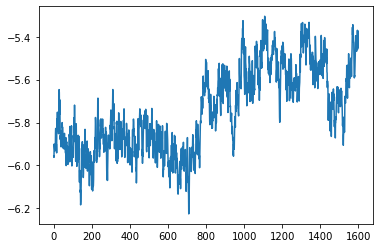

In [498]:
plt.plot(prediction_traj[equil_step:][:,50])

In [499]:
from scipy.stats import norm
from scipy.stats import t as student_t
individual_normal_likelihood_terms = norm.logpdf(prediction_traj, loc=expt_means, scale=expt_uncertainties)
individual_student_t_likelihood_terms = student_t.logpdf(prediction_traj, loc=expt_means, df=7) 


In [500]:
individual_normal_likelihood_terms.shape

(2000, 631)

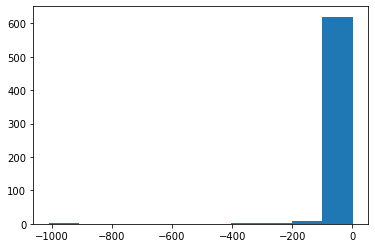

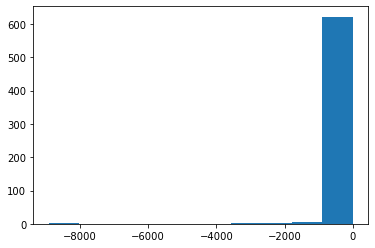

In [501]:
plt.hist(np.max(individual_normal_likelihood_terms, 0));
plt.figure()
plt.hist(np.min(individual_normal_likelihood_terms, 0));

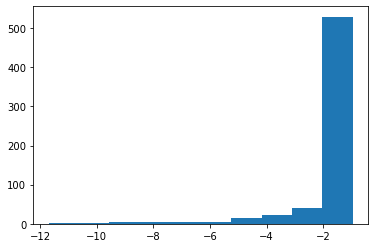

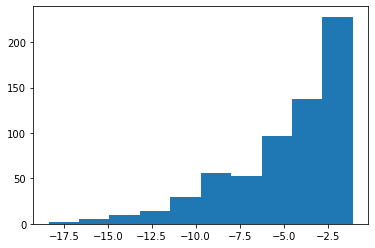

In [502]:
plt.hist(np.max(individual_student_t_likelihood_terms, 0));
plt.figure()
plt.hist(np.min(individual_student_t_likelihood_terms, 0));

In [503]:
worst_fit = np.argmin(np.max(individual_student_t_likelihood_terms, 0))
print(train_smiles[worst_fit])

c12c(c(c(c(c1Cl)Cl)Cl)Cl)Oc3c(c(c(c(c3Cl)Cl)Cl)Cl)O2


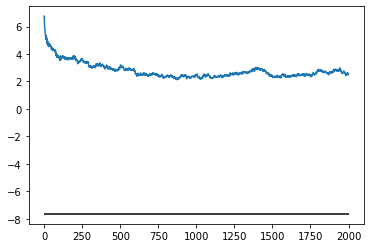

In [504]:
plt.plot(prediction_traj[:,worst_fit])
plt.hlines(expt_means[worst_fit], 0, len(prediction_traj))

'CCCCCCl'

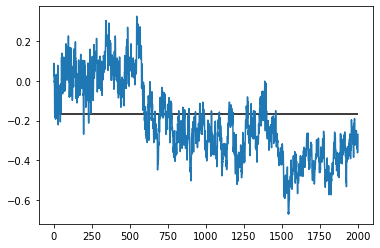

In [505]:
best_fit = np.argmax(np.min(individual_normal_likelihood_terms, 0))
plt.plot(prediction_traj[:,best_fit])
plt.hlines(expt_means[best_fit], 0, len(prediction_traj))
train_smiles[best_fit]

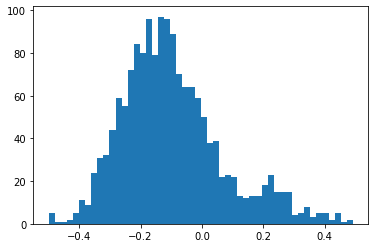

In [506]:
plt.hist(prediction_traj[equil_step:,best_fit] - expt_means[best_fit], bins=50);

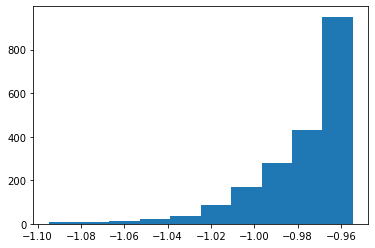

In [507]:
plt.hist(individual_student_t_likelihood_terms[:,best_fit]);

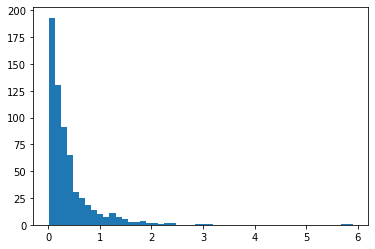

In [508]:
plt.hist(individual_student_t_likelihood_terms[equil_step:].std(0), bins=50);

In [509]:
from scipy.special import logsumexp
def weights_from_log_weights(log_weights):
    
    log_Z = logsumexp(log_weights)
    weights = np.exp(log_weights - log_Z)
    return weights


def ESS(log_weights):
    """
    TODO: look also at the function whose expectation we're trying to approximate...
    See "Rethinking the effective sample size" https://arxiv.org/abs/1809.04129
    and references therein for some inspiration in this direction...
    """
    weights = weights_from_log_weights(log_weights)
    return 1 / np.sum(weights ** 2)

In [510]:
loo_log_weights = -individual_student_t_likelihood_terms
effective_sample_sizes = np.array([ESS(loo_log_weights[equil_step:,i]) for i in range(loo_log_weights.shape[1])])

In [511]:
min(effective_sample_sizes)

66.42503382524085

In [512]:
len(individual_student_t_likelihood_terms[equil_step:])

1600

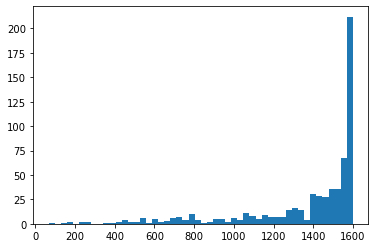

In [513]:
plt.hist(effective_sample_sizes, bins=50);

In [514]:
effective_sample_sizes[0]

778.0513777512457

# compare weighted LOO-CV CDF with experimental CDF...

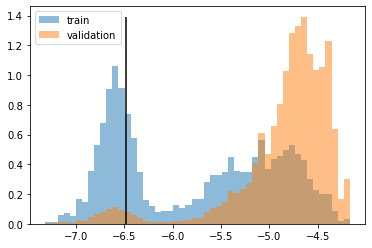

In [515]:
i = 5
w = weights_from_log_weights(loo_log_weights[equil_step:, i])
preds = kT_to_kcal_mol * prediction_traj[equil_step:, i]
plt.hist(preds, bins=50, density=True, label='train', alpha=0.5);
bin_heights, _, _ = plt.hist(preds, bins=50, density=True, weights=w, label='validation', alpha=0.5);
plt.legend()
plt.vlines(expt_means[i] * kT_to_kcal_mol, 0, max(bin_heights))
#plt.yscale('log')

In [516]:
inds = np.argsort(preds)

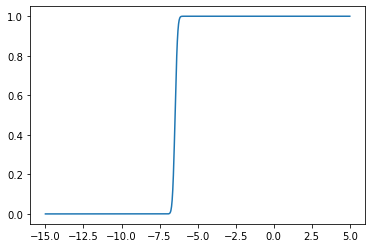

In [517]:
cdf_x = np.linspace(-15,5,1000)
expt_cdf = norm.cdf(cdf_x, loc=expt_means[i] * kT_to_kcal_mol, scale=expt_uncertainties[i] * kT_to_kcal_mol)
plt.plot(cdf_x, expt_cdf)

In [518]:
norm.cdf(-1, loc=0)

0.15865525393145707

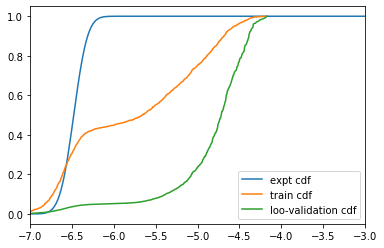

In [526]:
plt.plot(cdf_x, expt_cdf, label='expt cdf')
plt.plot(preds[inds],np.linspace(0,1,len(preds)), label='train cdf')
plt.plot(preds[inds],np.cumsum(w[inds]), label='loo-validation cdf')
plt.xlim(-7,-3)
plt.legend()

In [527]:
np.interp(x=(0.025, 0.975), xp=np.cumsum(w[inds]), fp=preds[inds])

array([-6.61173524, -4.27404291])

In [528]:
# TODO: a function that gives me an central 95% (or X%) predictive interval from weighted predictions...
def get_central_interval(predictions, weights, fraction_included=0.95):
    eps = (1.0 - fraction_included) / 2
    lower_quantile, upper_quantile = eps, 1.0 - eps
    
    inds = np.argsort(predictions)
    return np.interp(x=(lower_quantile, upper_quantile), xp=np.cumsum(weights[inds]), fp=predictions[inds])

In [529]:
interval = get_central_interval(preds, w)
interval

array([-6.61173524, -4.27404291])

In [530]:
def get_expt_density_in_interval(interval, expt_mean, expt_unc):
    expt_cdf = norm.cdf(interval, loc=expt_mean, scale=expt_unc)
    return expt_cdf[1] - expt_cdf[0]

In [531]:
unitd_expt_means = expt_means * kT_to_kcal_mol
unitd_expt_uncs = expt_uncertainties * kT_to_kcal_mol

In [532]:
get_expt_density_in_interval(interval, unitd_expt_means[i], unitd_expt_uncs[i])

0.8445530232481854

In [533]:
def get_calibration_curve(i, desired_coverage=np.linspace(0,1,100)):
    actual_coverage = np.nan * np.zeros(len(desired_coverage))
    for j in range(len(desired_coverage)):
        preds = kT_to_kcal_mol * prediction_traj[equil_step:, i]
        weights = weights_from_log_weights(loo_log_weights[equil_step:, i])
        interval = get_central_interval(preds, weights, desired_coverage[j])
        actual_coverage[j] = get_expt_density_in_interval(interval, unitd_expt_means[i], unitd_expt_uncs[i])
    return desired_coverage, actual_coverage

In [534]:
i = np.random.randint(0,631)
x_calibration, y_calibration = get_calibration_curve(i)

In [535]:
from tqdm import tqdm_notebook as tqdm
calibration_curves = []
for i in tqdm(range(len(expt_means))):
    x_calibration, y_calibration = get_calibration_curve(i)
    calibration_curves.append((x_calibration, y_calibration))


Text(0, 0.5, 'actual coverage probability')

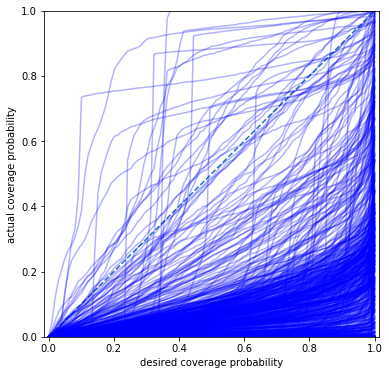

In [491]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)
plt.plot(np.linspace(0,1), np.linspace(0,1), '--')
ax.axis('equal')

for (x_,y_) in calibration_curves:
    plt.plot(x_, y_, color='blue', alpha=0.3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')

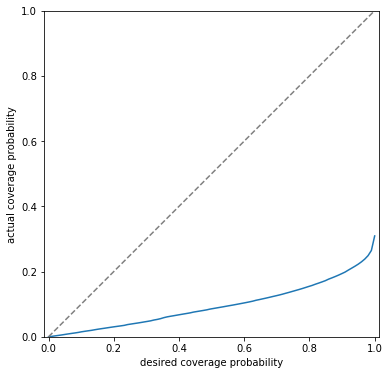

In [492]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

ax.axis('equal')

y_mean = np.mean([y_ for (x_, y_) in calibration_curves], 0)
plt.plot(x_, y_mean, label='with rjmc')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')

plt.plot(np.linspace(0,1), np.linspace(0,1), '--', color='grey')

# TODO: repeat for within-model-sampling only

In [440]:
from glob import glob
rwmh_path = '/Users/joshuafass/Desktop/fig3_results/'
suffix = '*.npz'
rwmh_fnames = glob(rwmh_path + 'rw_mh' + suffix)

def get_within_model_prediction_trajs():
    results = []
    for fname in rwmh_fnames:
        results.append(np.load(fname))
    return [r['prediction_traj'] for r in results]

In [441]:
within_model_prediction_trajs = get_within_model_prediction_trajs()

In [447]:
within_model_prediction_trajs[0].shape

(201, 631)

In [ ]:
# these can't be directly compared, because the amount of sampling is so different!!d

In [536]:
all_within_model_predictions = np.vstack([traj[(int(len(traj)/2)):] for traj in within_model_prediction_trajs[::10]])
all_within_model_predictions.shape

(1010, 631)

In [537]:
wm_loo_log_weights = - student_t.logpdf(all_within_model_predictions, loc=expt_means, df=7)

In [538]:
wm_loo_log_weights

array([[2.39733531, 2.9372743 , 5.49807292, ..., 1.12295707, 1.67336376,
        1.31913316],
       [2.57253394, 2.83907702, 5.64643543, ..., 1.05928493, 1.90391611,
        1.13288282],
       [2.43208477, 2.91651876, 5.46979224, ..., 1.12791112, 1.88983448,
        1.18782112],
       ...,
       [2.28415673, 2.0953295 , 5.50930052, ..., 1.24887617, 1.77436568,
        1.28402679],
       [2.50400712, 2.34029621, 5.50084089, ..., 1.18975731, 1.7310868 ,
        1.26530884],
       [2.29806455, 2.30815522, 5.53870813, ..., 1.19477334, 1.82307771,
        1.23650828]])

In [539]:
def get_within_model_calibration_curve(i, desired_coverage=np.linspace(0,1,100)):
    actual_coverage = np.nan * np.zeros(len(desired_coverage))
    for j in range(len(desired_coverage)):
        preds = kT_to_kcal_mol * all_within_model_predictions[:, i]
        weights = weights_from_log_weights(wm_loo_log_weights[:, i])
        interval = get_central_interval(preds, weights, desired_coverage[j])
        actual_coverage[j] = get_expt_density_in_interval(interval, unitd_expt_means[i], unitd_expt_uncs[i])
    return desired_coverage, actual_coverage

In [540]:
within_model_calibration_curves = []
for i in tqdm(range(len(expt_means))):
    x_calibration, y_calibration = get_within_model_calibration_curve(i)
    within_model_calibration_curves.append((x_calibration, y_calibration))

Text(0.5, 1.0, '')

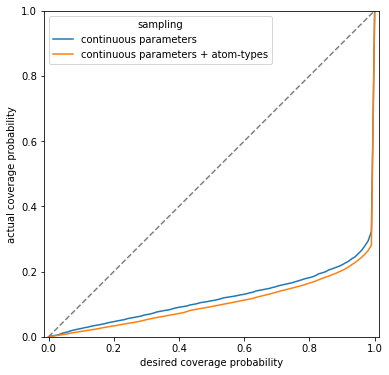

In [570]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

ax.axis('equal')

y_mean = np.mean([y_ for (x_, y_) in calibration_curves], 0)
y_mean_wm = np.mean([y_ for (x_, y_) in within_model_calibration_curves], 0)
y_mean[-1] = 1
y_mean_wm[-1] = 1
plt.plot(x_, y_mean_wm, label='continuous parameters')
plt.plot(x_, y_mean, label='continuous parameters + atom-types')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')

plt.legend(title='sampling')

plt.plot(np.linspace(0,1), np.linspace(0,1), '--', color='grey')

plt.title('')

# TODO: include EXP uncertainty!

In [363]:
max(bin_heights)

-5.100332968578879

In [355]:
expt_means[0]

DeviceArray(-8.3546327)

In [356]:
# todo: estimate the leave-one-out-CV RMSE
n_molecules = loo_log_weights.shape[1]
train_mean_preds = []
test_mean_preds = []

for i in range(n_molecules):
    preds_kcalmol = kT_to_kcal_mol * prediction_traj[equil_step:, i]
    #expt_kcalmol = kT_to_kcal_mol * expt_means[i]
    loo_weights = weights_from_log_weights(loo_log_weights[equil_step:, i])
    flat_weights = np.ones(len(loo_weights)) / len(loo_weights)
    
    train_mean_preds.append(np.dot(flat_weights, preds_kcalmol))
    test_mean_preds.append(np.dot(loo_weights, preds_kcalmol))

In [357]:
get_rmse_in_kcal_per_mol(np.array(train_mean_preds))

2.245186307447716

In [358]:
get_rmse_in_kcal_per_mol(np.array(test_mean_preds))

2.320717563617866

In [359]:
np.array(train_mses).shape

(631,)

(array([319., 147.,  70.,  40.,  23.,  17.,   8.,   2.,   1.,   4.]),
 array([0.05427934, 0.78405552, 1.5138317 , 2.24360788, 2.97338406,
        3.70316024, 4.43293642, 5.1627126 , 5.89248878, 6.62226496,
        7.35204114]),
 <a list of 10 Patch objects>)

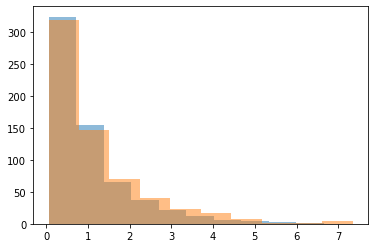

In [320]:
plt.hist(np.sqrt(train_mses), alpha=0.5)
plt.hist(np.sqrt(test_mses), alpha=0.5)

In [322]:
np.mean(np.sqrt(test_mses))

1.1588631841556518

In [323]:
np.mean(np.sqrt(train_mses))

1.0292951318333043

In [325]:
mean_pred = np.mean(prediction_traj[equil_step:], 0)
np.sqrt(np.mean((mean_pred - expt_means)**2))

2.3850958776476965

In [328]:
initial_pred = prediction_traj[0]
np.sqrt(np.mean((initial_pred - expt_means)**2))

4.087692956179104

In [329]:
final_pred = prediction_traj[-1]
np.sqrt(np.mean((final_pred - expt_means)**2))

2.22189330913734

In [309]:
prediction_traj[equil_step:, 0].max()

-4.755888296227326

In [183]:
# pick some random indices to inspect

worst_fit = np.argmin(np.max(individual_normal_likelihood_terms, 0))
train_smiles[worst_fit]

'c1ccc(c(c1)C=O)O'

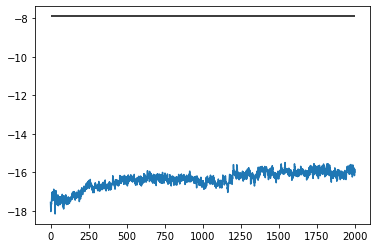

In [184]:
plt.plot(prediction_traj[:,worst_fit])
plt.hlines(expt_means[worst_fit], 0, len(prediction_traj))

In [174]:
mols[worst_fit].smiles

'c1ccc(c(c1)C=O)O'

# 4. Analyze pairwise comparisons...